In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
inpath = '/home/ck/DIR/cornkle/MCSfiles/TIR_on_GPM/GPM_MCS_20050319_2100.nc'

In [4]:
ds = xr.open_dataset(inpath)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/ck/DIR/cornkle/MCSfiles/TIR_on_GPM/GPM_MCS_20050319_2100.nc'

In [5]:
ds

NameError: name 'ds' is not defined

In [11]:
def draw_map(ds):
    f=plt.figure(figsize=(15,10))
    lat = ds['lat']
    lon = ds['lon']
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, ds['mcs']/100, transform=ccrs.PlateCarree())
    
    plt.contour(lon, lat, ds['rain']/100, transform=ccrs.PlateCarree(), cmap='jet')
    plt.colorbar()
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.title('Example storm')
    plt.show()

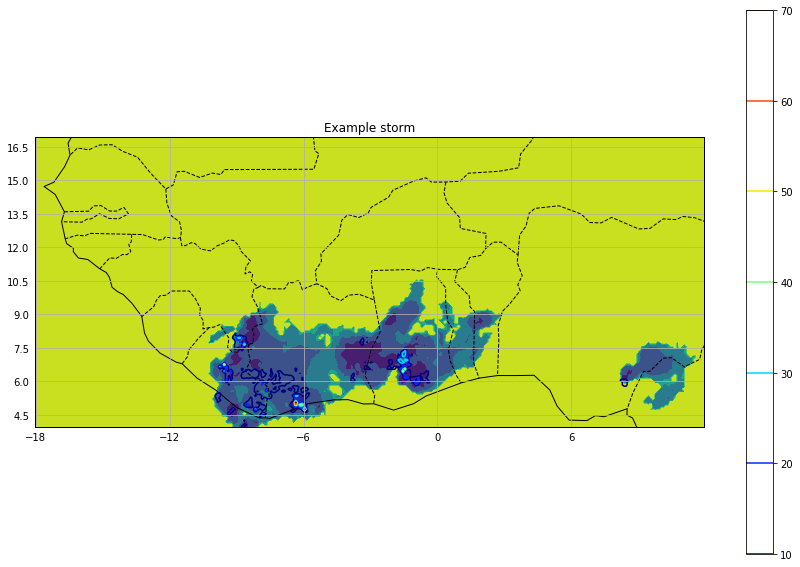

In [12]:
draw_map(ds)

In [13]:
ds

<xarray.Dataset>
Dimensions:  (lat: 131, lon: 301)
Coordinates:
    time     object ...
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 11.75 11.85 11.95
  * lat      (lat) float32 3.95 4.05 4.15 4.25 4.35 ... 16.65 16.75 16.85 16.95
Data variables:
    rain     (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    mcs      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    tir      (lat, lon) int16 0 0 0 0 0 0 ... 1989 1900 1900 1900 1900 1900

<xarray.Dataset>
Dimensions:  (x: 64, y: 123)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -59.176191187626294
    T90perc:    -53.0
    meanT_cut:  -59.176191187626294
    area:       819
    area_cut:   819


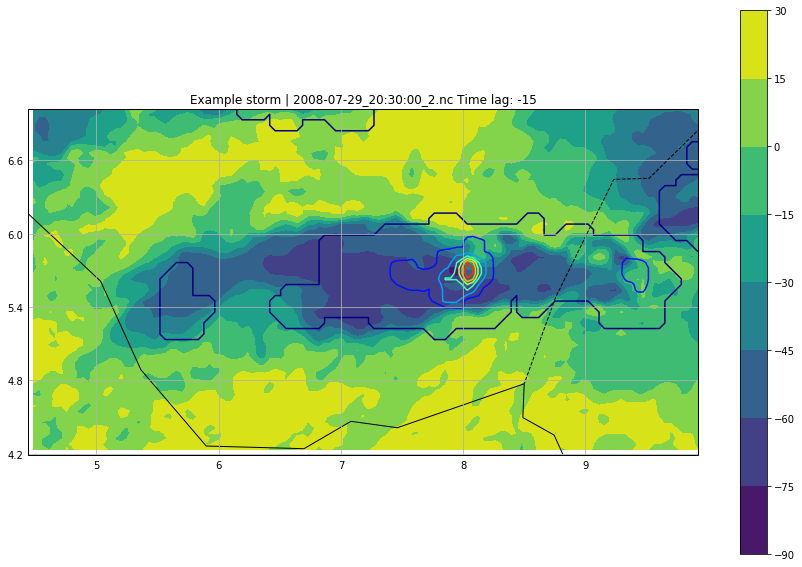

In [45]:
draw_map(storm_case2)

<xarray.Dataset>
Dimensions:  (x: 57, y: 83)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -56.980416764160005
    T90perc:    -53.0
    meanT_cut:  -57.831663578746735
    area:       484
    area_cut:   372


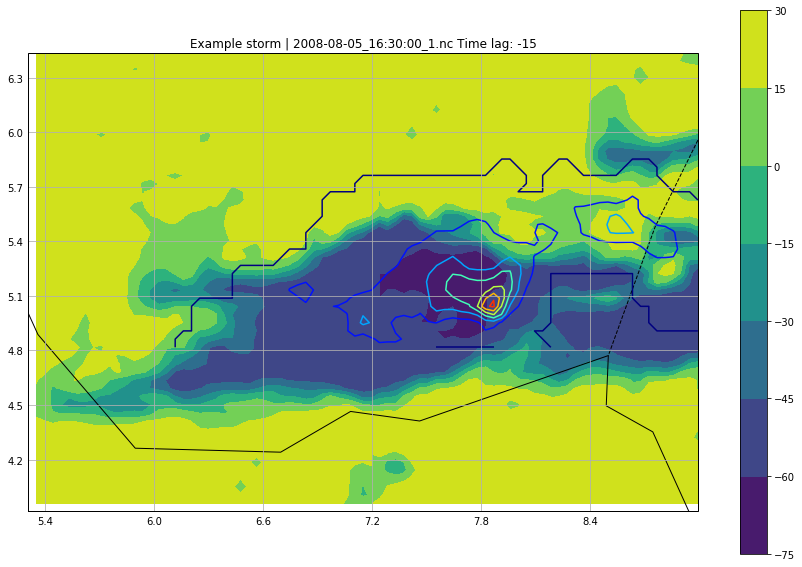

In [46]:
draw_map(storm_case3)

<xarray.Dataset>
Dimensions:  (x: 58, y: 76)
Coordinates:
    lon      (x, y) float64 ...
    lat      (x, y) float64 ...
    time     datetime64[ns] ...
Dimensions without coordinates: x, y
Data variables:
    p        (x, y) float64 ...
    t_lag0   (x, y) float64 ...
    tc_lag0  (x, y) float64 ...
Attributes:
    lag0:       -15
    meanT:      -58.20546566350775
    T90perc:    -52.0
    meanT_cut:  -58.20546566350775
    area:       281
    area_cut:   281


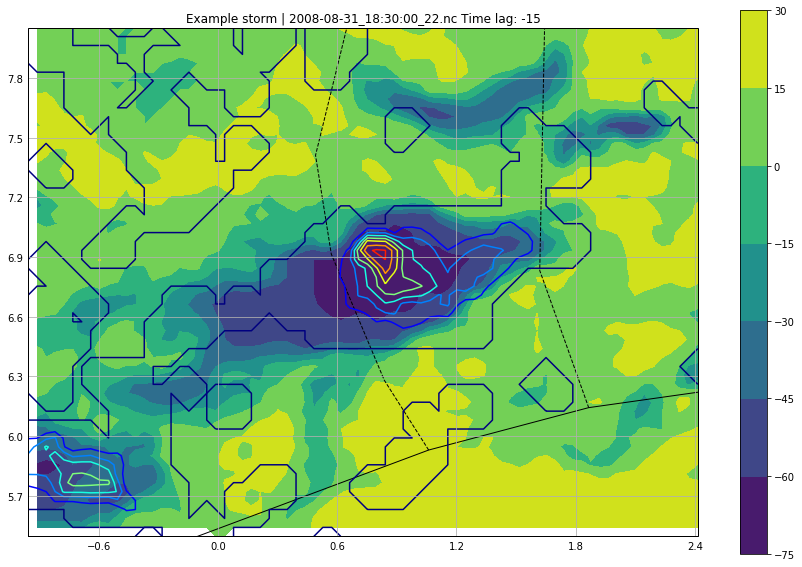

In [49]:
draw_map(storm_case4)

In [75]:
mf = xr.open_mfdataset('/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip/2006/09/*.nc4', concat_dim='time', autoclose=True)

In [70]:
mf

<xarray.Dataset>
Dimensions:            (lat: 141, lon: 301, time: 1488)
Coordinates:
  * lat                (lat) float32 3.95 4.05 4.15 4.25 ... 17.75 17.85 17.95
  * lon                (lon) float32 -18.05 -17.95 -17.85 ... 11.75 11.85 11.95
  * time               (time) datetime64[ns] 2006-07-01 ... 2006-07-31T23:30:00
Data variables:
    HQprecipSource     (time, lon, lat) float32 dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
    HQprecipitation    (time, lon, lat) float32 dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
    HQobservationTime  (time, lon, lat) timedelta64[ns] dask.array<shape=(1488, 301, 141), chunksize=(1, 301, 141)>
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/06;\nDOIauth...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dime

In [71]:
precip = mf['HQprecipitation'].sum('time')

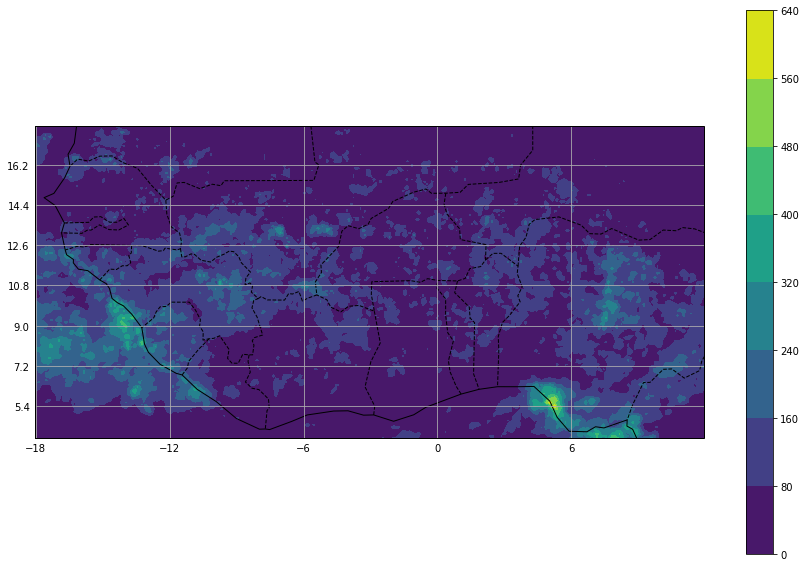

In [74]:
f=plt.figure(figsize=(15,10))
lat = precip['lat']
lon = precip['lon']
ax = f.add_subplot(111, projection=ccrs.PlateCarree())
plt.contourf(lon, lat, precip.T, transform=ccrs.PlateCarree())
plt.colorbar()
ax.coastlines()
# Gridlines
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
# Countries
ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
plt.show()